In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [19]:
np.random.seed(521)
Data = np.linspace(1.0 , 10.0 , num =100) [:, np. newaxis]
Target = np.sin( Data ) + 0.1 * np.power( Data , 2) \
+ 0.5 * np.random.randn(100 , 1)
randIdx = np.arange(100)
np.random.shuffle(randIdx)
trainData, trainTarget = Data[randIdx[:80]], Target[randIdx[:80]]
validData, validTarget = Data[randIdx[80:90]], Target[randIdx[80:90]]
testData, testTarget = Data[randIdx[90:100]], Target[randIdx[90:100]]

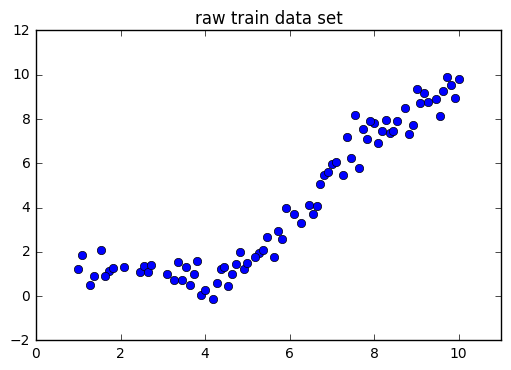

In [4]:
#plot of trainData
plt.plot(trainData, trainTarget, 'bo')
plt.axis([0,11, -2, 12])
plt.title("raw train data set")
plt.show()

In [5]:
def pairwise_dist(x, z):
    z = tf.transpose(z)
    return tf.squared_difference(x, z)

In [6]:
#testing pairwise_dist function
x = tf.constant([[1],[2],[3],[4]])
z = tf.constant([[1],[2],[3]])
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
print(sess.run(pairwise_dist(x,z)))

[[0 1 4]
 [1 0 1]
 [4 1 0]
 [9 4 1]]


In [7]:
def get_respon_mat(m, k):
    m = tf.transpose(m)
    values, indices = tf.nn.top_k(-m, k, sorted=True)
    values, sorted_indices = tf.nn.top_k(-sorted_indices, k, sorted=True)
    value = 1 / k
    res = tf.sparse_to_dense(sparse_indices=indices, output_shape=[m.shape[0]], sparse_values=value)   
    return res

In [8]:
r = get_respon_mat(trainData, 5)
sess.run(init)
sess.run(r)

UnboundLocalError: local variable 'sorted_indices' referenced before assignment

In [ ]:
# train model
kList = [1,3,5,50]
for k in kList:
    r = get_respon_mat(trainData, k)
    

In [9]:
r = get_respon_mat(pairwise_dist(tf.convert_to_tensor(trainData), tf.convert_to_tensor(trainData)), 1)
r = tf.expand_dims(r,1)
a = tf.convert_to_tensor(np.transpose(trainTarget),dtype=tf.float64)
b = tf.matmul(a, r)
sess.run(init)
sess.run(b)

UnboundLocalError: local variable 'sorted_indices' referenced before assignment

In [116]:
m = tf.convert_to_tensor(np.transpose(trainData),dtype=tf.float64)
values, indices = tf.nn.top_k(-m, 2, sorted=True)
values, sorted_indices = tf.nn.top_k(-indices, 2, sorted=True)
a = tf.sparse_to_dense(sparse_indices=[1,3,2], output_shape=[10], sparse_values=1)
sess.run(init)
sess.run(a)

SparseTensorValue(indices=array([[0, 1]], dtype=int64), values=array([1]), shape=array([ 1, 10], dtype=int64))

In [ ]:
trainDataT = tf.convert_to_tensor(trainData)
r = get_respon_mat(pairwise_dist(trainDataT, trainDataT).eval(), 1)
sess.run(init)
sess.run(r)

In [44]:
r = pairwise_dist(trainDataT, trainDataT)
a = get_top_k_indices(r.eval(), 3)
sess.run(init)
sess.run(a)

NameError: name 'trainDataT' is not defined

In [124]:
t = tf.convert_to_tensor([[1,2,3],[4,5,6]])
b = tf.convert_to_tensor([[0]*3,[1,1,1]])
t1 = tf.reshape(t, [2,3,1])
b1 = tf.reshape(b, [2,3,1])
c = tf.concat(2,[b1,t1])
c = tf.reshape(c, [-1,2])
d = tf.sparse_to_dense(sparse_indices=c, output_shape=[10,10], sparse_values=1)
sess.run(init)
sess.run(d)

array([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])